In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#use pytorch
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
#upload dataset
train_data = pd.read_csv("D:/EIC-Code/00-Python/Machine-Learning-HW/NeuralNetworks/bank-note/train.csv", header = None, names = ['variance','skewness','curtosis','entropy','y'])
test_data = pd.read_csv("D:/EIC-Code/00-Python/Machine-Learning-HW/NeuralNetworks/bank-note/test.csv",  header = None, names = ['variance','skewness','curtosis','entropy','y'])

In [ ]:
features = ['variance','skewness','curtosis','entropy']
outcome = 'y'

X_train = train_data[features].values #transfer to matrix
y_train = train_data[outcome].values
X_test = test_data[features].values
y_test = test_data[outcome].values

In [12]:
class NeuralNetwork:
    def __init__(self, weight_approach, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size1 = hidden_size
        self.hidden_size2 = hidden_size
        self.output_size = output_size

        if weight_approach == "random":
            # Initialize random weights
            self.weights_input_hidden1 = np.random.randn(self.input_size, self.hidden_size1)
            self.weights_hidden1_hidden2 = np.random.randn(self.hidden_size1, self.hidden_size2)
            self.weights_hidden2_output = np.random.randn(self.hidden_size2, self.output_size)
        elif weight_approach == "zero":
            # Initialize all weights to 0
            self.weights_input_hidden1 = np.zeros((self.input_size, self.hidden_size1))
            self.weights_hidden1_hidden2 = np.zeros((self.hidden_size1, self.hidden_size2))
            self.weights_hidden2_output = np.zeros((self.hidden_size2, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to first hidden layer
        self.hidden_activation1 = np.dot(X, self.weights_input_hidden1)
        self.hidden_output1 = self.sigmoid(self.hidden_activation1)

        # First hidden layer to second hidden layer
        self.hidden_activation2 = np.dot(self.hidden_output1, self.weights_hidden1_hidden2)
        self.hidden_output2 = self.sigmoid(self.hidden_activation2)

        # Second hidden layer to output layer
        self.output_activation = np.dot(self.hidden_output2, self.weights_hidden2_output)
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def compute_gradients(self, X, y):
        self.feedforward(X)

        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        gradient_weights_hidden2_output = np.dot(self.hidden_output2.T, output_delta)
       
        hidden2_error = np.dot(output_delta, self.weights_hidden2_output.T)
        hidden2_delta = hidden2_error * self.sigmoid_derivative(self.hidden_output2)

        gradient_weights_hidden1_hidden2 = np.dot(self.hidden_output1.T, hidden2_delta)

        hidden1_error = np.dot(hidden2_delta, self.weights_hidden1_hidden2.T)
        hidden1_delta = hidden1_error * self.sigmoid_derivative(self.hidden_output1)

        gradient_weights_input_hidden1 = np.dot(X.T, hidden1_delta)

        return {
            "gradient_weights_input_hidden1": gradient_weights_input_hidden1,
            "gradient_weights_hidden1_hidden2": gradient_weights_hidden1_hidden2,
            "gradient_weights_hidden2_output": gradient_weights_hidden2_output,
        }

    def backward(self, X, y, learning_rate):
        self.feedforward(X)

        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        hidden2_error = np.dot(output_delta, self.weights_hidden2_output.T)
        hidden2_delta = hidden2_error * self.sigmoid_derivative(self.hidden_output2)

        hidden1_error = np.dot(hidden2_delta, self.weights_hidden1_hidden2.T)
        hidden1_delta = hidden1_error * self.sigmoid_derivative(self.hidden_output1)

        self.weights_hidden2_output += np.dot(self.hidden_output2.T, output_delta) * learning_rate

        self.weights_hidden1_hidden2 += np.dot(self.hidden_output1.T, hidden2_delta) * learning_rate

        self.weights_input_hidden1 += np.dot(X.T, hidden1_delta) * learning_rate

    def train(self, X_train, y_train, X_test, y_test, epochs, gamma_0, d):
        training_errors = []
        test_errors = []

        for epoch in range(epochs):
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            learning_rate = gamma_0 / (1 + (gamma_0 / d) * epoch)

            for i in range(X_train.shape[0]):
                X_sample = X_train[i:i + 1]
                y_sample = y_train[i:i + 1]
                self.feedforward(X_sample)
                self.backward(X_sample, y_sample, learning_rate)

            train_output = self.feedforward(X_train)
            test_output = self.feedforward(X_test)
            training_errors.append(np.mean(np.square(y_train - train_output)))
            test_errors.append(np.mean(np.square(y_test - test_output)))

            if epoch % (epochs // 20) == 0:
                print(f"Epoch {epoch}, Training Loss: {training_errors[-1]:.6f}, Test Loss: {test_errors[-1]:.6f}")

        return training_errors, test_errors

In [15]:
#-------------Q1
y_train1 = y_train.copy()
X = X_train[[1]]
X_bias  = np.insert(X, 0, 1, axis=1) #add bias as 1 to the matrix
y = y_train1[[1]]

approach = 'random'
# Initialize the network
nn = NeuralNetwork(approach, input_size=5, hidden_size=3, output_size=1)

# Compute gradients
gradients = nn.compute_gradients(X_bias, y)

# Print gradients
print("Gradients for weights_input_hidden1:")
print(gradients["gradient_weights_input_hidden1"])
print("\nGradients for weights_hidden1_hidden2:")
print(gradients["gradient_weights_hidden1_hidden2"])
print("\nGradients for weights_hidden2_output:")
print(gradients["gradient_weights_hidden2_output"])

Gradients for weights_input_hidden1:
[[-1.77653766e-05 -5.65848524e-04  9.99451544e-05]
 [-7.11450036e-05 -2.26605358e-03  4.00250360e-04]
 [-8.16088104e-06 -2.59933837e-04  4.59118056e-05]
 [-2.41982194e-05 -7.70742275e-04  1.36135295e-04]
 [-2.87461558e-05 -9.15599497e-04  1.61721254e-04]]

Gradients for weights_hidden1_hidden2:
[[ 1.87968376e-03 -1.94062001e-02 -2.10279541e-02]
 [ 1.34064363e-03 -1.38410508e-02 -1.49977317e-02]
 [ 8.35204978e-06 -8.62280946e-05 -9.34340783e-05]]

Gradients for weights_hidden2_output:
[[-0.2388158 ]
 [-0.16433945]
 [-0.26948265]]



Training with hidden layer width: 5
Epoch 0, Training Loss: 1.209682, Test Loss: 1.218945
Epoch 25, Training Loss: 0.972825, Test Loss: 0.974798
Epoch 50, Training Loss: 0.941319, Test Loss: 0.941821
Epoch 75, Training Loss: 0.905538, Test Loss: 0.905953
Epoch 100, Training Loss: 0.859030, Test Loss: 0.860981
Epoch 125, Training Loss: 0.804980, Test Loss: 0.809501
Epoch 150, Training Loss: 0.751224, Test Loss: 0.758437
Epoch 175, Training Loss: 0.705971, Test Loss: 0.715207
Epoch 200, Training Loss: 0.672199, Test Loss: 0.682172
Epoch 225, Training Loss: 0.648152, Test Loss: 0.657935
Epoch 250, Training Loss: 0.630798, Test Loss: 0.639863
Epoch 275, Training Loss: 0.617887, Test Loss: 0.626068
Epoch 300, Training Loss: 0.608016, Test Loss: 0.615389
Epoch 325, Training Loss: 0.600420, Test Loss: 0.607030
Epoch 350, Training Loss: 0.594682, Test Loss: 0.600939
Epoch 375, Training Loss: 0.590325, Test Loss: 0.596263
Epoch 400, Training Loss: 0.586888, Test Loss: 0.592641
Epoch 425, Train

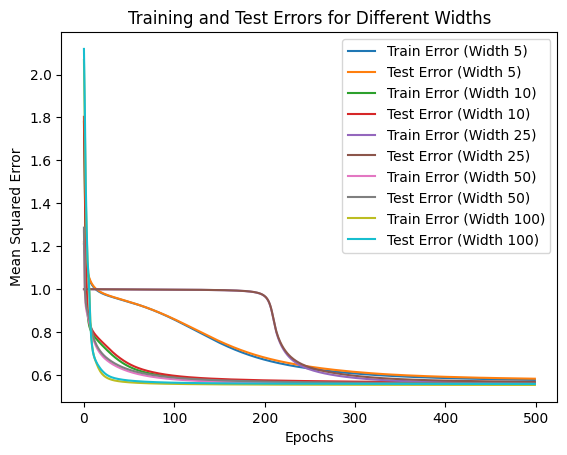

In [23]:
#------------------------random weights
#preprocessing X_train
X_train1 = X_train.copy()
X_test1 = X_test.copy()
y_train1 = y_train.copy()
y_test1 = y_test.copy()

#preprocess y data
y_train1[y_train1 == 0] = -1
y_test1[y_test1 == 0] = -1
y_train1 = y_train1.reshape(-1, 1)
y_test1 = y_test1.reshape(-1, 1)

#preprocess X data
X_train_with_bias = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))
X_test_with_bias = np.hstack((np.ones((X_test1.shape[0], 1)), X_test1))

# Initialize and train the neural network
widths = [5, 10, 25, 50, 100]  # Different hidden layer widths
gamma_0 = 0.001
d = 100
epochs = 500
approach = "random"

for width in widths:
    print(f"\nTraining with hidden layer width: {width}")
    nn = NeuralNetwork(approach, input_size=5, hidden_size=width, output_size=1)
    training_errors, test_errors = nn.train(X_train_with_bias, y_train1, X_test_with_bias, y_test1, epochs, gamma_0, d)

    # Plot training and test errors
    plt.plot(training_errors, label=f"Train Error (Width {width})")
    plt.plot(test_errors, label=f"Test Error (Width {width})")

plt.title("Training and Test Errors for Different Widths")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


Training with hidden layer width: 5
Epoch 0, Training Loss: 1.310916, Test Loss: 1.318464
Epoch 25, Training Loss: 1.035735, Test Loss: 1.037622
Epoch 50, Training Loss: 1.007035, Test Loss: 1.007824
Epoch 75, Training Loss: 0.997649, Test Loss: 0.997943
Epoch 100, Training Loss: 0.992906, Test Loss: 0.992910
Epoch 125, Training Loss: 0.989518, Test Loss: 0.989305
Epoch 150, Training Loss: 0.986483, Test Loss: 0.986079
Epoch 175, Training Loss: 0.983424, Test Loss: 0.982841
Epoch 200, Training Loss: 0.980214, Test Loss: 0.979475
Epoch 225, Training Loss: 0.976870, Test Loss: 0.976014
Epoch 250, Training Loss: 0.973494, Test Loss: 0.972572
Epoch 275, Training Loss: 0.970225, Test Loss: 0.969288
Epoch 300, Training Loss: 0.967178, Test Loss: 0.966268
Epoch 325, Training Loss: 0.964406, Test Loss: 0.963556
Epoch 350, Training Loss: 0.961915, Test Loss: 0.961144
Epoch 375, Training Loss: 0.959678, Test Loss: 0.959001
Epoch 400, Training Loss: 0.957665, Test Loss: 0.957090
Epoch 425, Train

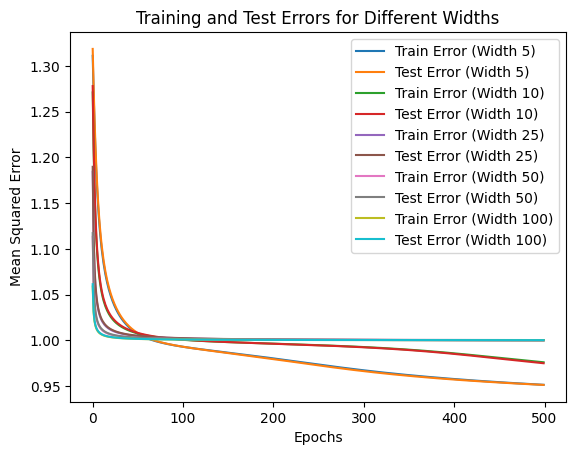

In [24]:
# Initialize and train the neural network
widths = [5, 10, 25, 50, 100]  # Different hidden layer widths
gamma_0 = 0.001
d = 100
epochs = 500
approach2 = "zero"

for width in widths:
    print(f"\nTraining with hidden layer width: {width}")
    nn = NeuralNetwork(approach2, input_size=5, hidden_size=width, output_size=1) #add a bias term
    training_errors, test_errors = nn.train(X_train_with_bias, y_train1, X_test_with_bias, y_test1, epochs, gamma_0, d)

    # Plot training and test errors
    plt.plot(training_errors, label=f"Train Error (Width {width})")
    plt.plot(test_errors, label=f"Test Error (Width {width})")

plt.title("Training and Test Errors for Different Widths")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

In [28]:
# Define the neural network class
class NeuralNetwork2(nn.Module):
    def __init__(self, input_size, depth, width, activation):
        super(NeuralNetwork2, self).__init__()
        layers = []

        # Input layer
        layers.append(nn.Linear(input_size, width))
        if activation == "tanh":
            layers.append(nn.Tanh())
        elif activation == "relu":
            layers.append(nn.ReLU())

        # Hidden layers
        for _ in range(depth - 2):  # Depth includes input and output layers
            layers.append(nn.Linear(width, width))
            if activation == "tanh":
                layers.append(nn.Tanh())
            elif activation == "relu":
                layers.append(nn.ReLU())

        # Output layer
        layers.append(nn.Linear(width, 1))
        layers.append(nn.Sigmoid())  # Output layer for binary classification

        self.model = nn.Sequential(*layers)

        # Weight initialization
        for layer in self.model:
            if isinstance(layer, nn.Linear):
                if activation == "tanh":
                    nn.init.xavier_uniform_(layer.weight)
                elif activation == "relu":
                    nn.init.kaiming_uniform_(layer.weight, nonlinearity="relu")

    def forward(self, x):
        return self.model(x)


# Training function
def train_model(model, train_loader, test_loader, epochs, learning_rate):
    criterion = nn.BCELoss()  # Binary cross-entropy loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        # Evaluate on test set
        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                test_loss += loss.item()

        test_losses.append(test_loss / len(test_loader))

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Train Loss: {train_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}")

    return train_losses, test_losses


In [29]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()
y_train2 = y_train.copy()
y_test2 = y_test.copy()

y_train2 = y_train2.reshape(-1, 1)
y_test2 = y_test2.reshape(-1, 1)

#preprocess X data
X_train2_with_bias = np.hstack((np.ones((X_train2.shape[0], 1)), X_train2))
X_test2_with_bias = np.hstack((np.ones((X_test2.shape[0], 1)), X_test2))

Epoch 0, Train Loss: 0.410683, Test Loss: 0.227019
Epoch 10, Train Loss: 0.004836, Test Loss: 0.005084
Epoch 20, Train Loss: 0.001424, Test Loss: 0.001660
Epoch 30, Train Loss: 0.000655, Test Loss: 0.000799
Epoch 40, Train Loss: 0.000392, Test Loss: 0.000486
Epoch 50, Train Loss: 0.000249, Test Loss: 0.000309
Epoch 60, Train Loss: 0.000177, Test Loss: 0.000219
Epoch 70, Train Loss: 0.000129, Test Loss: 0.000159
Epoch 80, Train Loss: 0.000099, Test Loss: 0.000122
Epoch 90, Train Loss: 0.000076, Test Loss: 0.000093
Epoch 100, Train Loss: 0.000060, Test Loss: 0.000074
Epoch 110, Train Loss: 0.000049, Test Loss: 0.000060
Epoch 120, Train Loss: 0.000040, Test Loss: 0.000048
Epoch 130, Train Loss: 0.000033, Test Loss: 0.000041
Epoch 140, Train Loss: 0.000027, Test Loss: 0.000033
Epoch 150, Train Loss: 0.000023, Test Loss: 0.000028
Epoch 160, Train Loss: 0.000019, Test Loss: 0.000023
Epoch 170, Train Loss: 0.000016, Test Loss: 0.000020
Epoch 180, Train Loss: 0.000014, Test Loss: 0.000016
Epoc

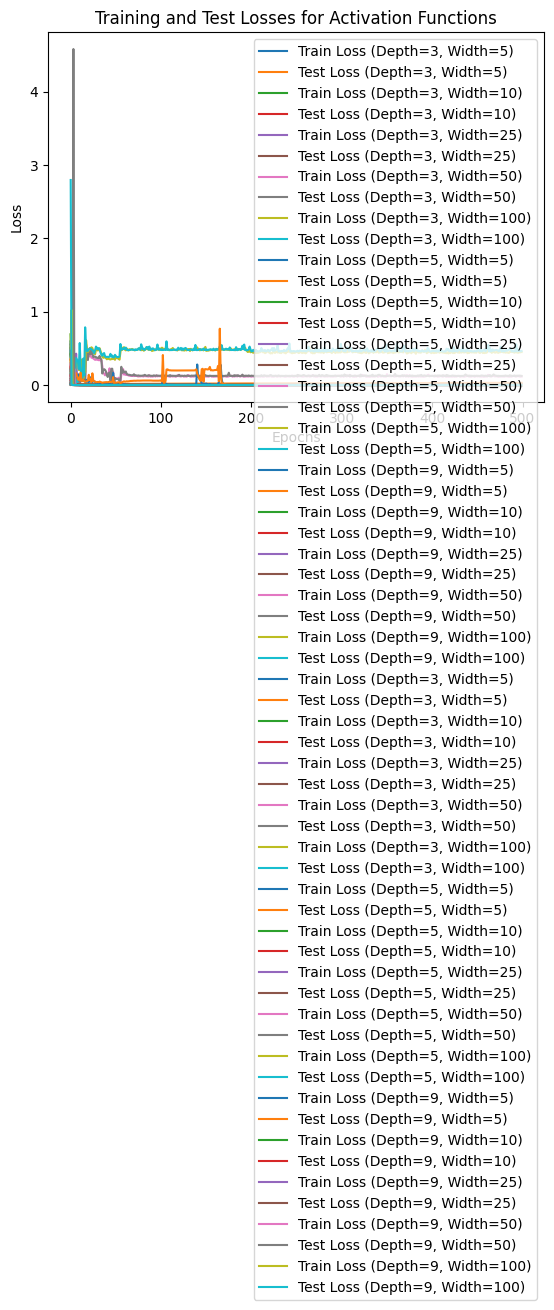

In [30]:
# Main experiment
depths = [3, 5, 9]
widths = [5, 10, 25, 50, 100]
activation_functions = ["tanh", "relu"]
learning_rate = 0.01
epochs = 500
batch_size = 32

X_train_tensor = torch.tensor(X_train2_with_bias, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test2_with_bias, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train2, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test2, dtype=torch.float32)

# Convert data to PyTorch dataloaders
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

results = {}

for activation in activation_functions:
    #print(f"\nUsing activation function: {activation}")
    for depth in depths:
        for width in widths:
            #print(f"\nTraining model with depth={depth}, width={width}")

            # Initialize and train the model
            model = NeuralNetwork2(input_size=5, depth=depth, width=width, activation=activation)
            train_losses, test_losses = train_model(model, train_loader, test_loader, epochs, learning_rate)

            # Store results
            results[(activation, depth, width)] = (train_losses, test_losses)

            # Plot losses
            plt.plot(train_losses, label=f"Train Loss (Depth={depth}, Width={width})")
            plt.plot(test_losses, label=f"Test Loss (Depth={depth}, Width={width})")

plt.title(f"Training and Test Losses for Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()